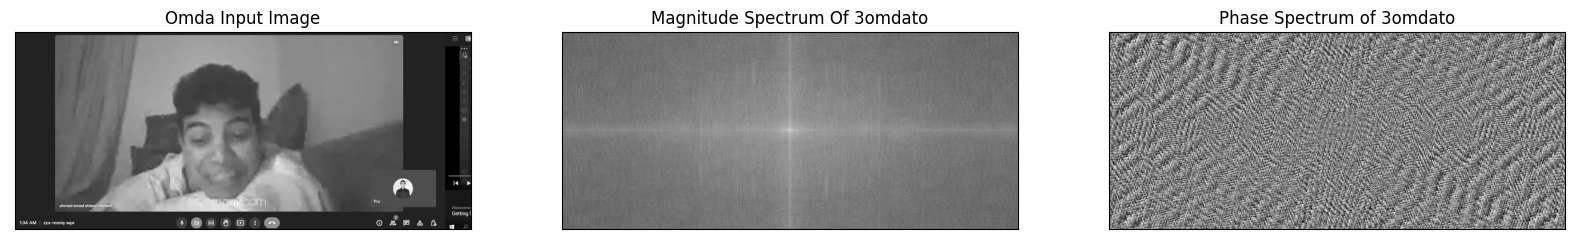

In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

img = cv2.imread(r'C:/Users/dell/omda.png',0)

dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
mag, ang = cv2.cartToPolar(dft_shift[:,:,0],dft_shift[:,:,1])

plt.figure(figsize=(20,10))
plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Omda Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum Of 3omdato'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(ang, cmap = 'gray')
plt.title('Phase Spectrum of 3omdato'), plt.xticks([]), plt.yticks([])
plt.show()

In [3]:
def foo(image):
    dft = cv2.dft(np.float32(image),flags = cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)

    magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
    mag, ang = cv2.cartToPolar(dft_shift[:,:,0],dft_shift[:,:,1])
    
    return mag, ang

In [4]:
img1 = cv2.imread(r'assets/1.png',0)
img2 = cv2.imread(r'assets/2.png',0)
img3 = cv2.imread(r'assets/3.png',0)
img4 = cv2.imread(r'assets/4.png',0)
img5 = cv2.imread(r'assets/5.png',0)
img6 = cv2.imread(r'assets/6.png',0)
img7 = cv2.imread(r'assets/7.png',0)
img8 = cv2.imread(r'assets/8.png',0)

In [5]:
images = [img1, img2, img3, img4, img5, img6, img7, img8]
titles = ['img1', 'img2', 'img3', 'img4', 'img5', 'img6', 'img7', 'img8']

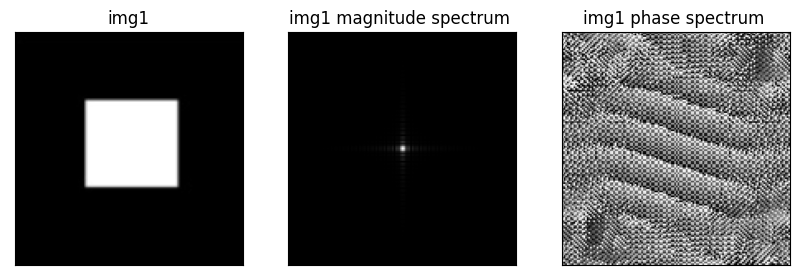

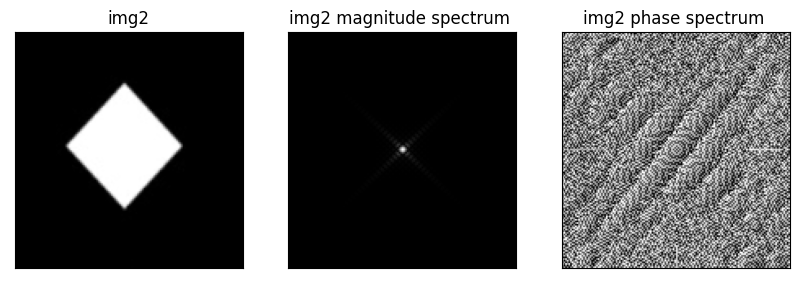

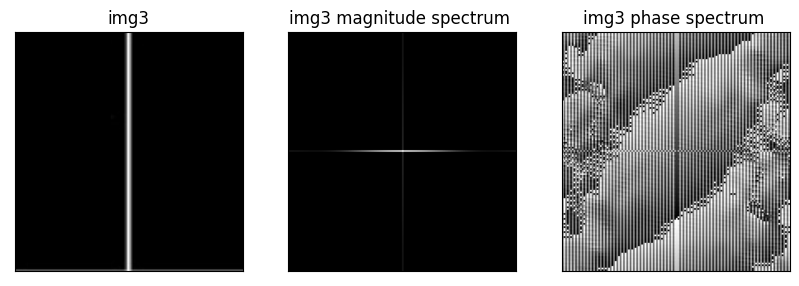

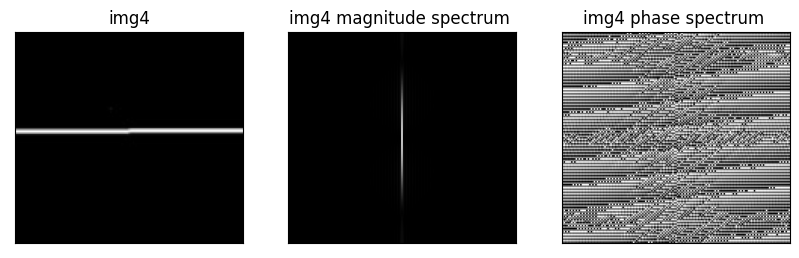

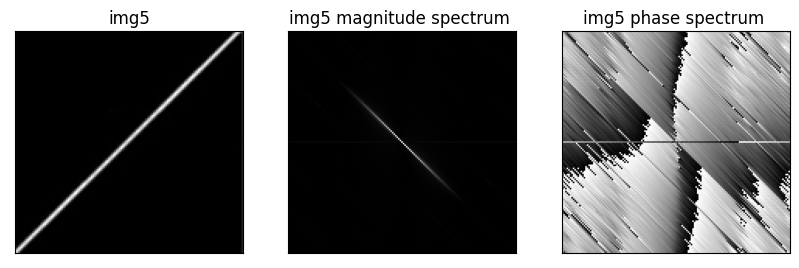

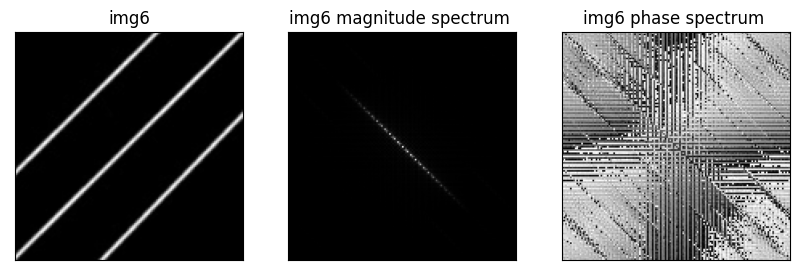

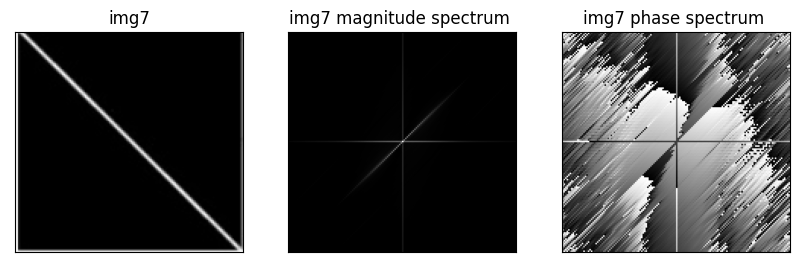

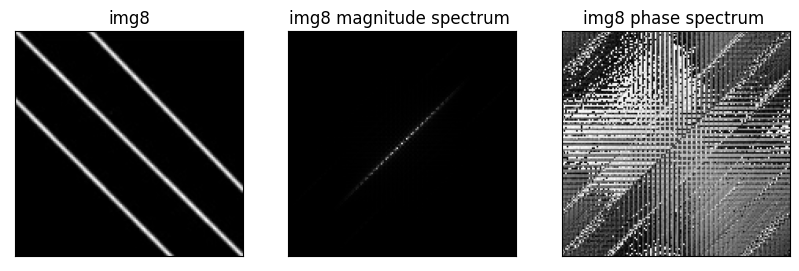

In [6]:
for i in range(8):
    plt.figure(figsize=(10,30))
    k = 1
    plt.subplot(8,3,k),plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

    plt.subplot(8,3,k+1),plt.imshow(foo(images[i])[0],'gray')
    plt.title(titles[i]+' magnitude spectrum ')
    plt.xticks([]),plt.yticks([])

    plt.subplot(8,3,k+2),plt.imshow(foo(images[i])[1],'gray')
    plt.title(titles[i]+' phase spectrum ')
    plt.xticks([]),plt.yticks([])
    plt.show()

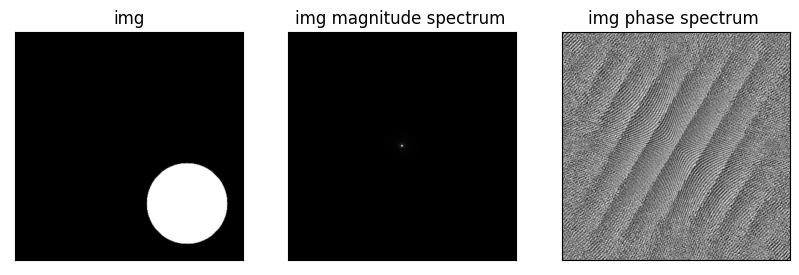

In [7]:
img1 = cv2.imread(r'assets/circle.png',0)

plt.figure(figsize=(10,30))
k = 1
plt.subplot(8,3,k),plt.imshow(img1, 'gray')
plt.title("img")
plt.xticks([]),plt.yticks([])

plt.subplot(8,3,k+1),plt.imshow(foo(img1)[0],'gray')
plt.title("img"+' magnitude spectrum ')
plt.xticks([]),plt.yticks([])

plt.subplot(8,3,k+2),plt.imshow(foo(img1)[1],'gray')
plt.title("img"+' phase spectrum ')
plt.xticks([]),plt.yticks([])
plt.show()

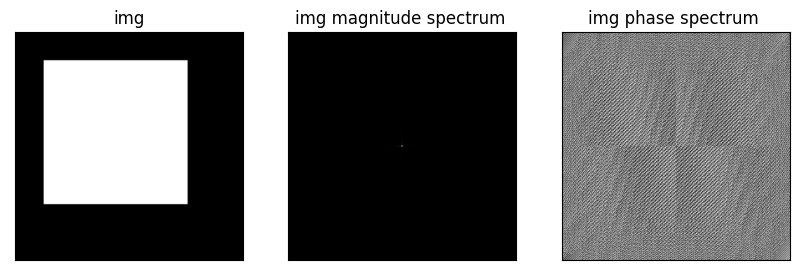

In [8]:
img1 = cv2.imread(r'assets/rectangle.png',0)

plt.figure(figsize=(10,30))
k = 1
plt.subplot(8,3,k),plt.imshow(img1, 'gray')
plt.title("img")
plt.xticks([]),plt.yticks([])

plt.subplot(8,3,k+1),plt.imshow(foo(img1)[0],'gray')
plt.title("img"+' magnitude spectrum ')
plt.xticks([]),plt.yticks([])

plt.subplot(8,3,k+2),plt.imshow(foo(img1)[1],'gray')
plt.title("img"+' phase spectrum ')
plt.xticks([]),plt.yticks([])
plt.show()

# image copmression la2eto 2olt a7otto belmarra

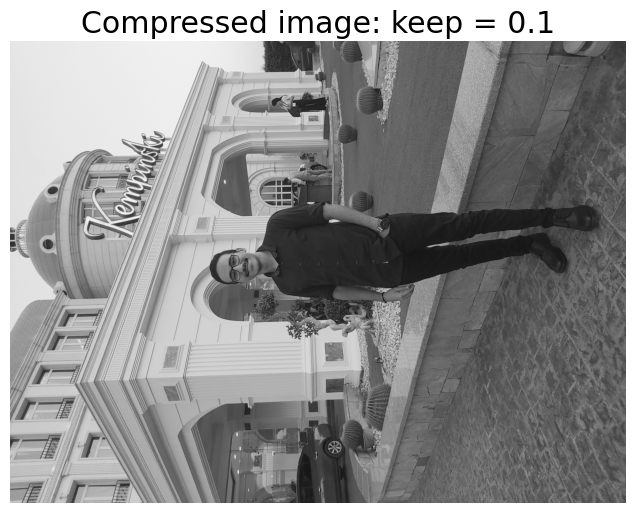

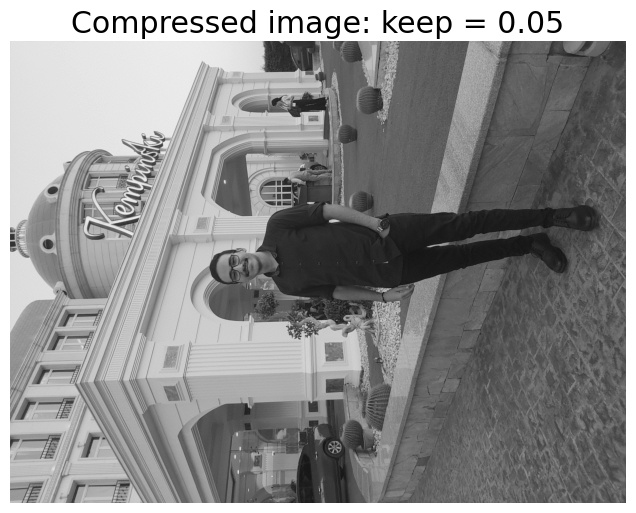

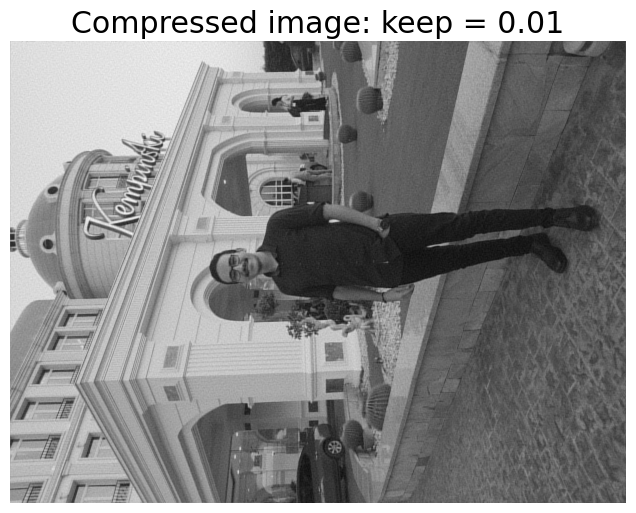

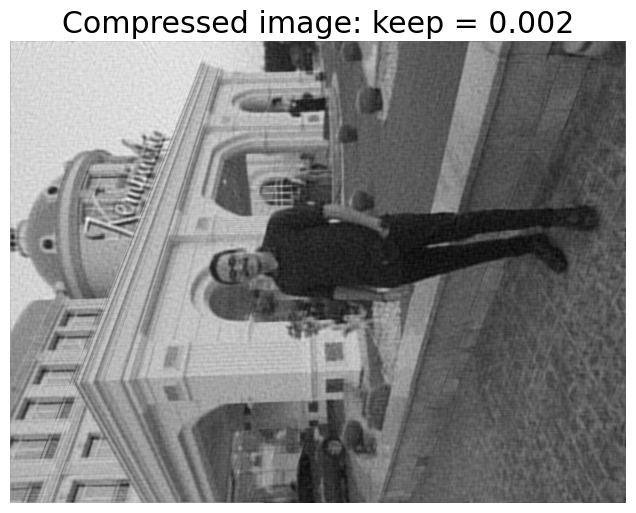

In [11]:
from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [9, 6]
plt.rcParams.update({'font.size': 18})

A = imread('assets/megzawy.jpg')
B = np.mean(A, -1); # Convert RGB to grayscale

Bt = np.fft.fft2(B)
Btsort = np.sort(np.abs(Bt.reshape(-1))) # sort by magnitude

# Zero out all small coefficients and inverse transform
for keep in (0.1, 0.05, 0.01, 0.002):
    thresh = Btsort[int(np.floor((1-keep)*len(Btsort)))]
    ind = np.abs(Bt)>thresh          # Find small indices
    Atlow = Bt * ind                 # Threshold small indices
    Alow = np.fft.ifft2(Atlow).real  # Compressed image
    plt.figure()
    plt.imshow(Alow,cmap='gray')
    plt.axis('off')
    plt.title('Compressed image: keep = ' + str(keep))